In [2]:
import pandas as pd

In [22]:
df = pd.read_csv(r'sdcReduced2.csv')

In [23]:
df.head()

,room_temp,above_temp,smoke,CO,CO2,O2,Label
0,26.5,25.8,0.299,0.074,1.03,21.0,0
1,26.7,25.8,0.296,0.078,1.03,21.0,0
2,26.6,25.9,0.299,0.077,1.03,21.0,0
3,26.5,25.8,0.296,0.073,1.03,20.9,0
4,26.7,25.9,0.302,0.077,1.03,21.0,0


In [24]:
df.count()

room_temp     5450
above_temp    5450
smoke         5450
CO            5450
CO2           5450
O2            5450
Label         5450
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis='columns'), df['Label'], test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
model.score(X_test, y_test)

0.9899082568807339

In [28]:
y_predicted = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[282,   2],
       [  9, 797]], dtype=int64)

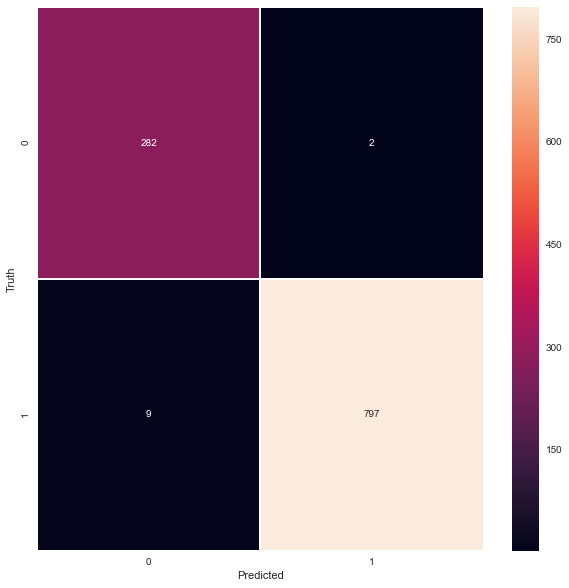

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=1, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#plt.title('Confusion matrix: Random Forest Classifier')
plt.savefig('confusion.png',dpi=300)
plt.show()

In [31]:
from sklearn.metrics import log_loss
log_loss(y_test,y_predicted)

0.34855792618245773

In [32]:
pred_prob1 = model.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.9965160067102365


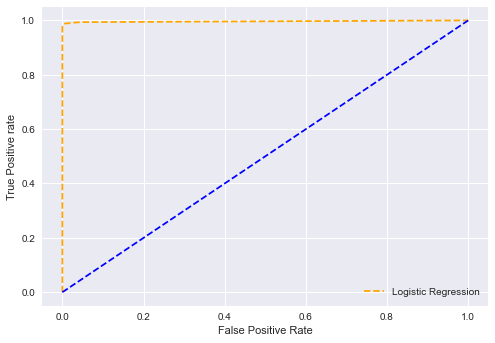

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
#plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

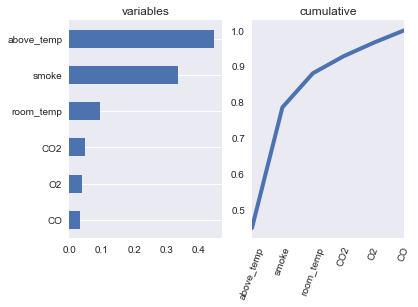

In [48]:
from sklearn import ensemble
import numpy as np
import matplotlib.pyplot as plt


X = X_train
y = y_train
feature_names = df.drop('Label', axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
#fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.savefig('variable_imp.png',dpi=300,bbox_inches="tight")
plt.show()

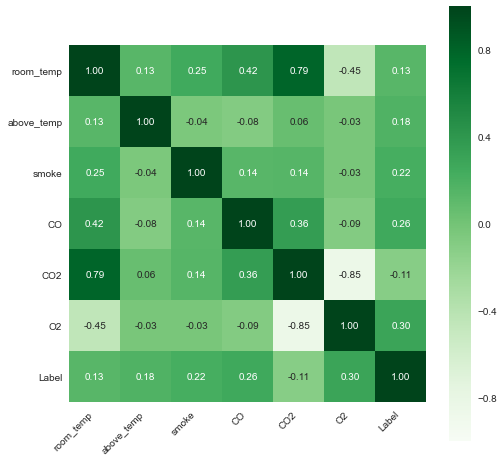

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

pyplot.figure(figsize=(8, 8))

data = pd.read_csv('sdcReduced2.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    cmap="Greens",
    annot=True, fmt=".2f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#plt.title('Correlation Matrix Plot')

plt.savefig('allenabled_1.png',bbox_inches="tight")